In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import wrangle_mall

### Exercises
Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

- 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

a. Choose features other than the ones used in the lesson.

b. Visualize the results of your clustering.

c. Use the elbow method to visually select a good value for k.

d. Repeat the clustering, this time with 3 different features.

- 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

- 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

Bonus
a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
b) Visualize the data and guess the number and shape of the clusters.
c) Implement the KMeans algorithm on unscaled data and visualize the clusters.
d) Repeat the step above but with scaled data.
c) Write down the takeaways from this exercise.

In [2]:
iris = sns.load_dataset('iris')

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,2


In [8]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [13]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
clusters = kmeans.predict(X)
clusters

array([0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0,
       2, 0, 1, 0], dtype=int32)

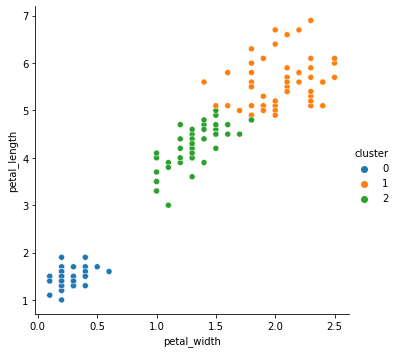

In [3]:
X = iris[['petal_length', 'petal_width']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
iris['cluster'] = kmeans.labels_
iris.cluster = iris.cluster.astype('category')

sns.relplot(data=iris, y='petal_length', x='petal_width', hue='cluster')

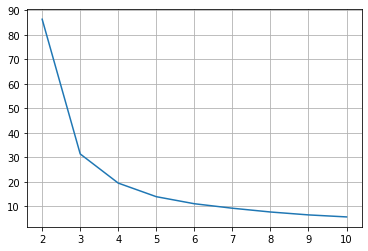

In [4]:
inertias = {k: KMeans(n_clusters=k).fit(X).inertia_ for k in range(2, 11)}
pd.Series(inertias).plot()
plt.grid()

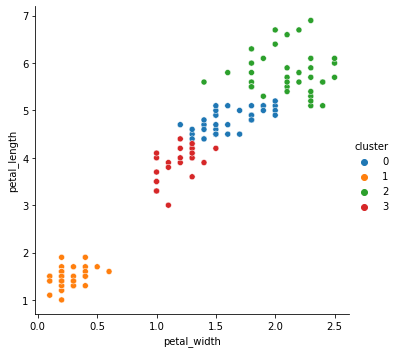

In [5]:
X = iris[['petal_length', 'petal_width']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
iris['cluster'] = kmeans.labels_
iris.cluster = iris.cluster.astype('category')

sns.relplot(data=iris, y='petal_length', x='petal_width', hue='cluster')

Text(0.5, 0.98, "clusters based on ['sepal_length', 'sepal_width']")

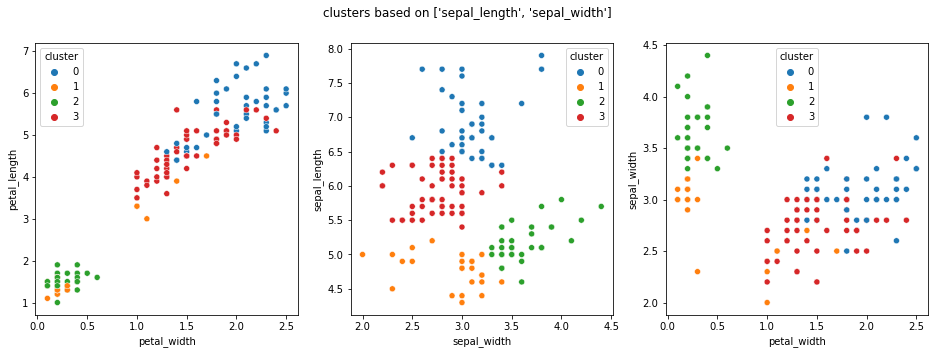

In [6]:
X = iris[['sepal_length', 'sepal_width']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
iris['cluster'] = kmeans.labels_
iris.cluster = iris.cluster.astype('category')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

sns.scatterplot(data=iris, y='petal_length', x='petal_width', hue='cluster', ax=ax1)
sns.scatterplot(data=iris, y='sepal_length', x='sepal_width', hue='cluster', ax=ax2)
sns.scatterplot(data=iris, y='sepal_width', x='petal_width', hue='cluster', ax=ax3)
fig.suptitle(f'clusters based on {X.columns.tolist()}')

In [9]:
customers = wrangle_mall.acquire()
train, validate, test = wrangle_mall.split(customers)
train_scaled, _, _ = wrangle_mall.scale(train, validate, test)

Train: 136 rows, 5 cols
Validate: 34 rows, 5 cols
Test: 30 rows, 5 cols


In [10]:
X = train[['annual_income', 'spending_score']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
train['cluster'] = kmeans.labels_
train.cluster = train.cluster.astype('category')

,age,annual_income,spending_score,is_female,count
0,42.483333,54.633333,49.466667,0.616667,60
1,32.173913,88.434783,79.565217,0.608696,23
2,40.909091,88.318182,18.000000,0.590909,22
3,24.764706,25.588235,79.529412,0.529412,17
4,47.500000,24.857143,18.000000,0.500000,14


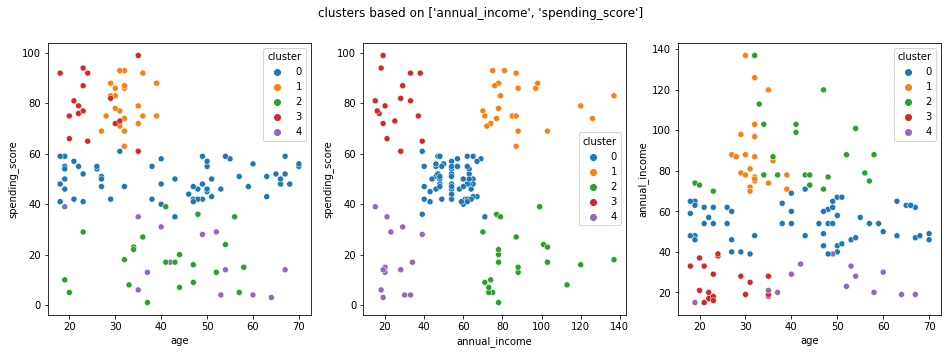

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

sns.scatterplot(data=train, y='spending_score', x='age', hue='cluster', ax=ax1)
sns.scatterplot(data=train, y='spending_score', x='annual_income', hue='cluster', ax=ax2)
sns.scatterplot(data=train, y='annual_income', x='age', hue='cluster', ax=ax3)
fig.suptitle(f'clusters based on {X.columns.tolist()}')

means_by_cluster = (train
 .assign(is_female=train.gender == 'Female')
 .drop(columns=['gender', 'customer_id'])
 .groupby('cluster')
 .mean())
pd.concat([
    means_by_cluster,
    train.cluster.value_counts().sort_index().rename('count')
], axis=1)

### Takeaways:

- most data points in cluster 4
- clusters 0, 2, and 4 tend be quite varied wrt age
- clusters 1 and 3, the high spenders, tend to be younger

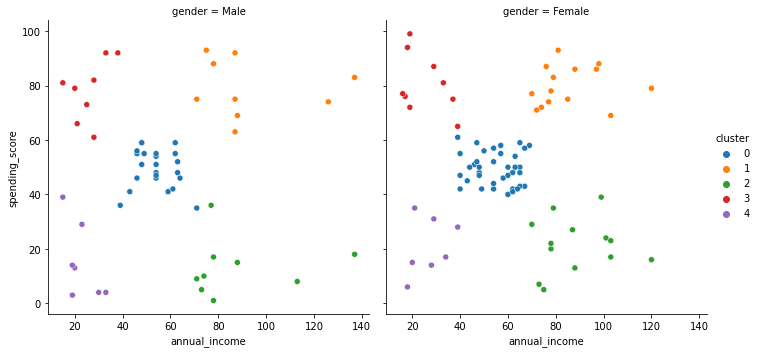

In [12]:
sns.relplot(data=train, hue='cluster', col='gender', y='spending_score', x='annual_income')